#📌 Урок: Визуализация данных с помощью Pandas и Matplotlib
# 📖 Теоретический минимум
## 🔹 Основные библиотеки визуализации
Matplotlib - базовая библиотека для создания статических, анимированных и интерактивных визуализаций

Pandas - встроенные методы визуализации на основе Matplotlib

Seaborn - библиотека для создания статистических графиков (работает поверх Matplotlib)

## 🔹 Типы графиков и их применение
Линейные графики - тенденции изменения во времени

Столбчатые диаграммы - сравнение категориальных данных

Круговые диаграммы - доли составных частей

Гистограммы - распределение данных

Точечные диаграммы - взаимосвязь между двумя переменными

## 🔹 Основные принципы хорошей визуализации
Простота и ясность

Правильный выбор типа графика

Адекватные подписи и легенда

Оптимальное использование цвета

Отсутствие визуального шума


## 📖 Материалы

https://vkvideo.ru/video-194554202_456239677

https://vkvideo.ru/playlist/-16108331_55984952








In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Загрузка данных из файла Excel
url = 'https://docs.google.com/spreadsheets/d/1y9ekfl_0NOFLQtwqzXcJdijcMqquSDUn_XqtW-S7R3Q/export?format=xlsx'

# Чтение листов в два отдельных DataFrame
reservoir_df = pd.read_excel(url, sheet_name='Reservoir', index_col=False)
wells_df = pd.read_excel(url, sheet_name='Wells', index_col=False, names=['date',	'field_id',	'well_id', 'oil',	'gas',	'water'])

In [4]:
wells_df = wells_df.dropna(how="any")
wells_df

,date,field_id,well_id,oil,gas,water
0,2021-07-01 00:00:00,Новое,1,128.048011,0,0.000000
1,2024-08-01 00:00:00,Старое,1,2.553258,14.42423,274.737692
2,2022-09-01 00:00:00,Старое,3а,0.982410,25.353305,182.408922
3,2023-11-01 00:00:00,Старое,3а,0.754156,25.149471,228.776968
4,2020-04-01 00:00:00,Новое,1,167.177177,0,0.000000
...,...,...,...,...,...,...
919,2023-11-01 00:00:00,Новое,1,70.296660,0,0.000000
920,2022-07-01 00:00:00,Старое,3а,1.140113,24.17841,181.145298
921,2024-01-01 00:00:00,Старое,5,1.957010,85.242499,227.324250
922,2021-04-01 00:00:00,Новое,3,151.104133,0,0.000000


In [5]:
reservoir_df

,date,field_id,well_id,reserves,pressure,oil_density
0,2020-01-01,Старое,1,5428,189,860
1,2020-01-01,Старое,2,5234,193,860
2,2020-01-01,Старое,3,5142,180,860
3,2020-01-01,Старое,3а,5341,180,860
4,2020-01-01,Старое,5,5381,191,860
5,2020-01-01,Новое,1,12734,350,730
6,2020-01-01,Новое,2,15735,350,730
7,2020-01-01,Новое,3,14263,350,730



# 🏆 Задания

## 1️⃣ Линейный график динамики добычи нефти
**Задача:**
 Напишите функцию принимающую месторождение и имя скважины и формирующую график добычи нефти по годам

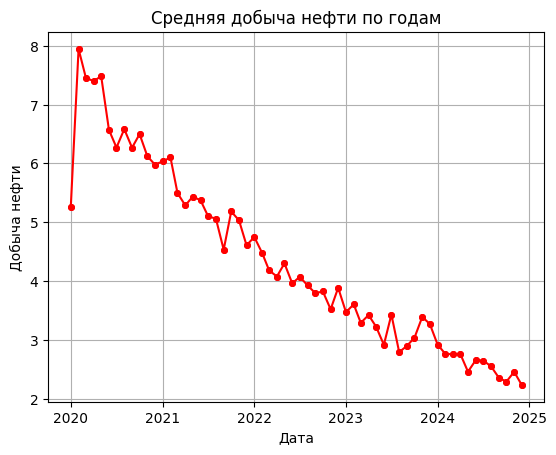

In [6]:
def oil_production(field, well):

    data = wells_df[(wells_df['field_id'] == field) & (wells_df['well_id'] == well)].sort_values(['date'])

    plt.plot(data['date'], data['oil'], marker="o", markersize = 4, color = 'r')
    plt.title('Средняя добыча нефти по годам')
    plt.xlabel('Дата')
    plt.ylabel('Добыча нефти')
    plt.grid()

oil_production('Старое', 1)


## 2️⃣ Столбчатая диаграмма

**Задача:**

Напишите функцию формирующую cравнение добычи по месторождениям (столбчатая диаграмма)




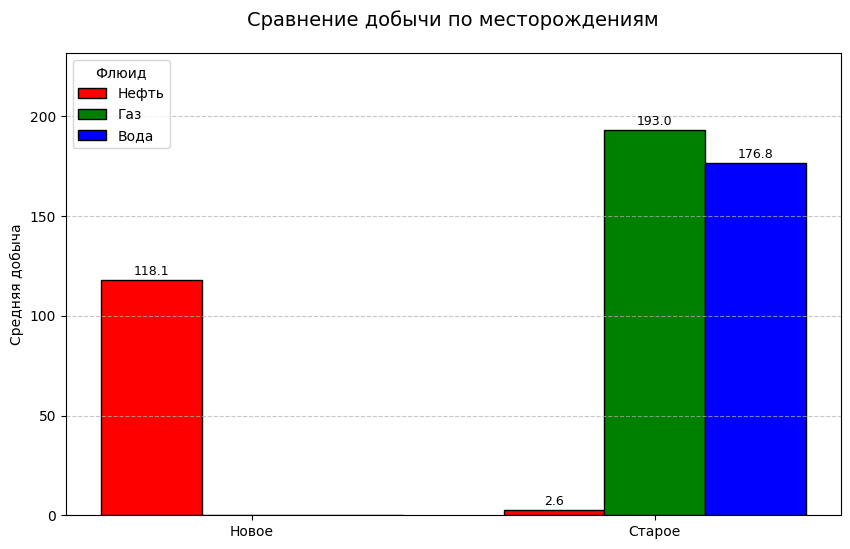

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def production_fields():
    filtered_df = wells_df[wells_df['field_id'].isin(['Старое', 'Новое'])].copy()

    for col in ['oil', 'gas', 'water']:
        filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')
    filtered_df = filtered_df.dropna(subset=['oil', 'gas', 'water'])


    grouped = filtered_df.groupby('field_id')[['oil', 'gas', 'water']].mean()
    fluids = ['Нефть', 'Газ', 'Вода']
    fields = grouped.index.tolist()

    bar_width = 0.25
    x = np.arange(len(fields))
    fig, ax = plt.subplots(figsize=(10, 6))

    colors = ['r', 'g', 'b']
    for i, (fluid, col_name) in enumerate(zip(fluids, ['oil', 'gas', 'water'])):
        values = grouped[col_name].values
        positions = x + i * bar_width
        bars = ax.bar(positions, values, bar_width, label=fluid, color=colors[i], edgecolor='black')

        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.1f}', ha='center', va='bottom', fontsize=9)

    # Настройка осей
    ax.set_ylabel('Средняя добыча', fontsize=10)
    ax.set_title('Сравнение добычи по месторождениям', fontsize=14, pad=20)
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(fields)
    ax.set_ylim(0, grouped.max().max() * 1.2)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Легенда
    ax.legend(title='Флюид', loc='upper left')


production_fields()

## 3️⃣  Круговая диаграмма
**Задача:**Напишите функцию формирующую визуализацию накопленной добычи нефти по скважинам одного месторождения (круговая диаграмма)

---



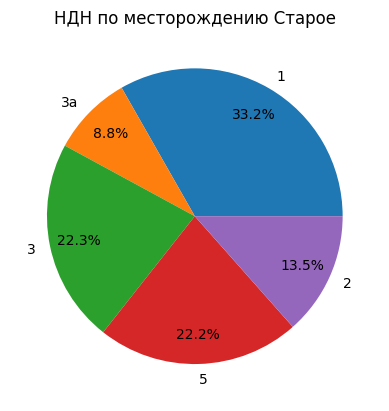

In [8]:
def production_on_wells(field):
    data = wells_df[wells_df['field_id'] == field]
    label = data['well_id'].unique()
    x = [data[data['well_id'] == i]['oil'].sum() for i in label]
    plt.pie(x, labels=label, autopct='%.1f%%', pctdistance=0.8, textprops={'fontsize': 10})
    plt.title(f'НДН по месторождению {field}')
production_on_wells('Старое')


## 4️⃣   Tornado plot


**Задача:**  Постройте tornado plot для визуализации накопленной добычи жидкости для каждой скважины.
---




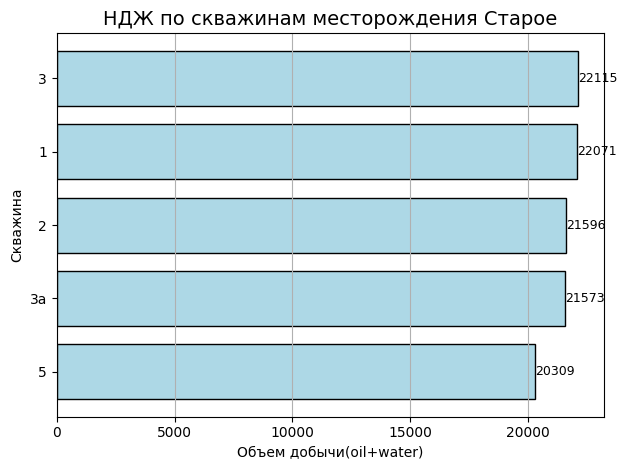

In [9]:
def cum_liquid(field):
    filtered_data = wells_df[wells_df['field_id'] == field]
    data = filtered_data.groupby("well_id")[["oil", "water"]].sum().reset_index()
    data["liquid"] = data["oil"] + data["water"]
    data = data.sort_values("liquid")

    bars_liquid = plt.barh(
        data["well_id"].astype(str), data["liquid"], height=0.75, label="Жидкость", color='lightblue', edgecolor='black')

    for index, value in enumerate(data["liquid"]):
        plt.text(value, index, f"{value:.0f}", va="center", ha="left", fontsize=9)

    plt.title(f"НДЖ по скважинам месторождения {field}", fontsize=14)
    plt.xlabel("Объем добычи(oil+water)", fontsize=10)
    plt.ylabel("Скважина", fontsize=10)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.grid()
cum_liquid('Старое')


## 5️⃣ 3D визуализации
**Задача:**

Создайте изображение в 3D для отображения каждой скважины в осях накопленный дебит нефти, газа, воды

---


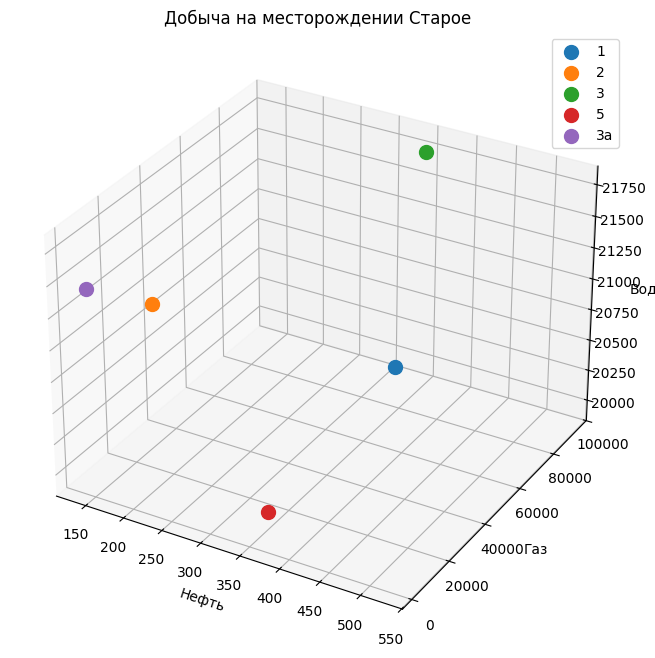

In [10]:
def production_3d(field):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    filtered_data = wells_df[wells_df['field_id'] == field]
    grouped = filtered_data.groupby('well_id')[['oil', 'gas', 'water']].sum().reset_index()

    for _, row in grouped.iterrows():
        ax.scatter(row['oil'], row['gas'], row['water'],marker='o', label=row['well_id'], s=100)
    ax.set_xlabel('Нефть')
    ax.set_ylabel('Газ')
    ax.set_zlabel('Вода')
    plt.title(f'Добыча на месторождении {field}')
    ax.legend()

production_3d('Старое')